Import required libs


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
data = pd.read_csv('phonerisk.csv')
data

,age,gender,Mobile Phone risk rating,blue collar or white collar,Doing Sports,education,Vacations,phone price
0,73,Male,10,1,1,Doctoral degree,15,1
1,38,Female,18,1,1,High school diploma or equivalent,16,1
2,33,Female,7,0,1,High school diploma or equivalent,17,0
3,68,Female,12,1,1,High school diploma or equivalent,10,0
4,53,Female,7,1,0,Associate degree,7,1
...,...,...,...,...,...,...,...,...
9995,71,Female,13,1,1,"Some college, no degree",15,1
9996,71,Male,5,0,0,Bachelor’s degree,17,0
9997,25,Male,16,1,1,Master’s degree,13,1
9998,70,Female,2,1,1,Master’s degree,4,0


Splits data into target and training x,y

In [5]:
from sklearn.model_selection import train_test_split

x = data.drop(['Mobile Phone risk rating'],axis=1)
y = data['Mobile Phone risk rating']

In [6]:
x_train, x_test, y_train , y_test = train_test_split(x, y, test_size=0.2)

In [7]:
train_data = x_train.join(y_train)

In [8]:
train_data['gender'] = train_data['gender'].replace(['Female','Male'],[0,1])
train_data['education'] = train_data['education'].replace(['Associate degree','High school diploma or equivalent','Some college, no degree','Less than high school','Bachelor’s degree','Doctoral degree','Master’s degree'],
[1,0,0,0,1,1,1])

In [9]:
train_data['education']

4159    1
8960    0
3728    1
2919    1
9351    0
       ..
8403    0
7179    1
503     1
1400    1
3672    0
Name: education, Length: 8000, dtype: int64

<AxesSubplot: >

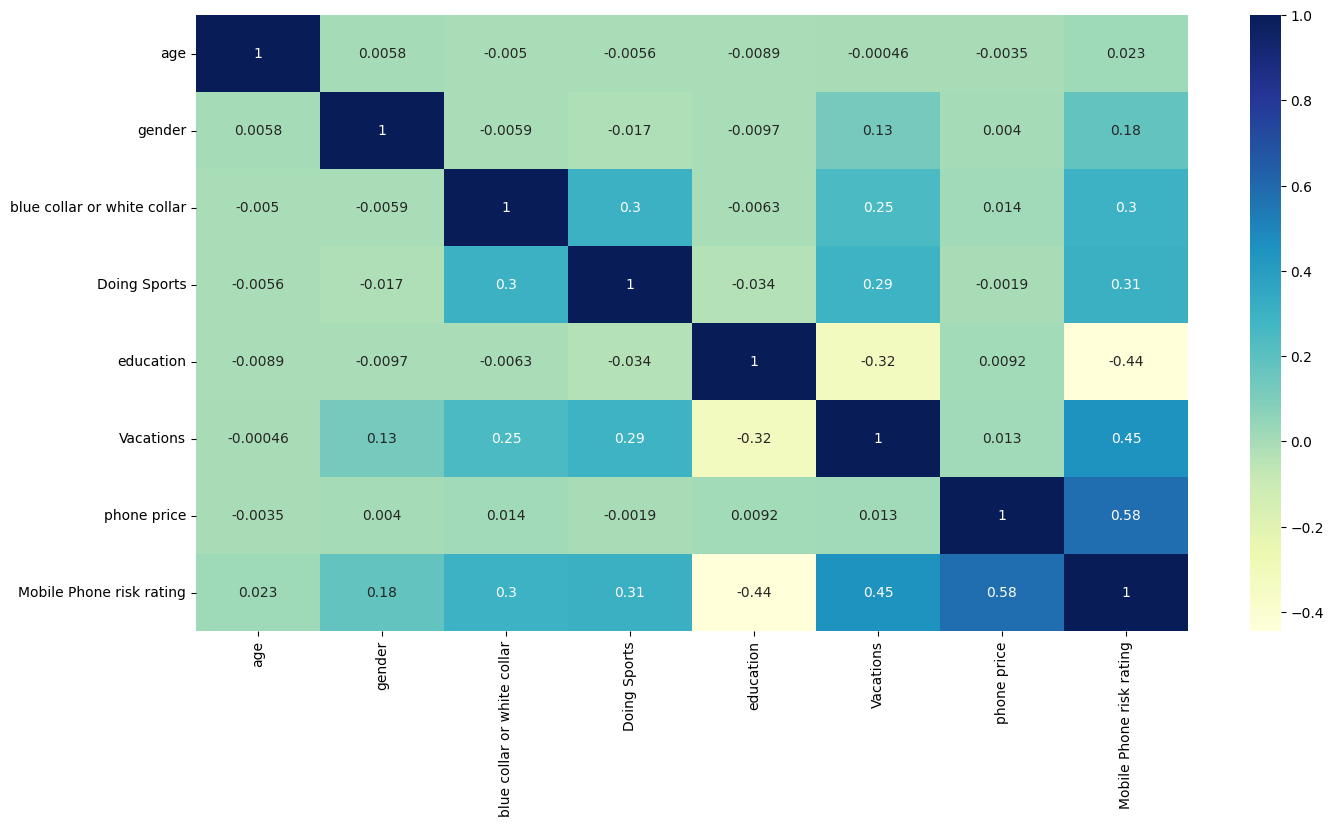

In [10]:
plt.figure(figsize=(16,8))
sns.heatmap(train_data.corr(),annot=True,cmap="YlGnBu")

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = train_data.drop(['Mobile Phone risk rating'],axis=1)
y_train = train_data['Mobile Phone risk rating']
test_data = x_test.join(y_test)
test_data['gender'] = test_data['gender'].replace(['Female','Male'],[0,1])
#test_data = test_data.join(pd.get_dummies(test_data.education)).drop(['education'], axis=1)
test_data['education'] = test_data['education'].replace(['Associate degree','High school diploma or equivalent','Some college, no degree','Less than high school','Bachelor’s degree','Doctoral degree','Master’s degree'],
[1,0,0,0,1,1,1])
x_test = test_data.drop(['Mobile Phone risk rating'],axis=1)
y_test = test_data['Mobile Phone risk rating']
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)


In [12]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()

forest.fit(x_train,y_train)
forest.score(x_test,y_test)

0.7264960308951955

tuning the params

In [13]:
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()

param_grid = {
    "min_samples_split":[410,420,430],
    "n_estimators":[150,145,155]
}

grid = GridSearchCV(forest, param_grid,cv=5,scoring="neg_mean_squared_error",return_train_score=True)
grid.fit(x_train,y_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'min_samples_split': [410, 420, 430],
                         'n_estimators': [150, 145, 155]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [14]:

best_grid = grid.best_estimator_
grid.best_estimator_

RandomForestRegressor(min_samples_split=410, n_estimators=155)

In [15]:
best_grid.score(x_test,y_test)

0.7866685805714945

save model


In [16]:
import joblib
joblib.dump(best_grid,'model.joblib')

['model.joblib']